In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
# Data Ingestion
csv_path = 'hotel_bookings.csv'
df_hotel = pd.read_csv(csv_path)

### Data Inspection and Cleaning

In [3]:
df_hotel.shape

(119390, 32)

In [4]:
df_hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
df_hotel.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1.0,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1.0,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2.0,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,03/07/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2.0,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,03/07/2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2.0,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,06/05/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2.0,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,22/04/2015


In [6]:
# Check if missing values exist
df_hotel.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 1
children                               4
babies                                 0
meal                                   0
country                              507
market_segment                         2
distribution_channel                   1
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     1
assigned_room_type                     1
booking_changes                        0
deposit_type                          21
agent                              16340
company         

In [7]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119389 non-null  float64
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### TODO: Handle Missing Values

Missing columns are: <br />
Format: `<col_name> (no. of missing vlaues),`
- adults (1),
- children (4),
- country (507),
- market_segment (2),
- distribution_channel (1),
- reserved_room_type (1),
- assigned_room_type (1),
- deposit_type (21),
- agent (16340),
- company (112593),
- customer_type (31),
- reservation_status (1)



#### Data Imputation

Rows/Cols with minimum missing values (like in the range of 1-10) can be deleted because it does not provide much significance and simplies the data analysis process.

In [8]:
cols_to_delete = ['adults', 'children', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'reservation_status']
df_hotel.dropna(subset=cols_to_delete, inplace=True)

**Note**: Filled the missing values (country-column) with the most repeated country

In [9]:
country_mode = df_hotel.country.mode()[0]
df_hotel['country'].fillna(country_mode, inplace=True)

In [10]:
df_hotel[df_hotel['country'].isna()] # null values check

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


**Note**: Filled the missing values (deposit_type-column) with the most repeated frequency

In [11]:
df_hotel['deposit_type'].describe()

count         119358
unique             3
top       No Deposit
freq          104620
Name: deposit_type, dtype: object

In [12]:
mode_dt = df_hotel['deposit_type'].mode()[0]
df_hotel['deposit_type'].fillna(mode_dt, inplace=True)

**Note**: Filled the agent and company column with 0 because they are company ids and agents ids, thus 0 means undefined company id and agent id.

In [13]:
df_hotel['agent'].fillna(0, inplace=True)
df_hotel['company'].fillna(0, inplace=True)

**Note**: Filled the customer type with the most repeated frequency (mode)

In [14]:
mode_ct = df_hotel['customer_type'].mode()[0]
df_hotel['customer_type'].fillna(mode_ct, inplace=True)

In [15]:
# Check if null values still exist?
df_hotel.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

#### Duplicate Data Handling

In [16]:
df_hotel.duplicated().sum() # 32009 rows are duplicates

32009

In [17]:
# Copy the dataset in a separate variable and drop duplicated values
data = df_hotel.copy()
data.drop_duplicates(inplace=True)

In [18]:
f"Duplicated rows: {data.duplicated().sum()}" # after deleting

'Duplicated rows: 0'

#### Converting to appropriate data types

In [19]:
dtype= {'hotel':'category', 
        'is_canceled':'category', 
        'lead_time':'int64', 
        'arrival_date_year':'category',
        'arrival_date_month':'category', 
        'arrival_date_week_number':'int64',
        'arrival_date_day_of_month':'int64', 
        'stays_in_weekend_nights':'int64',
        'stays_in_week_nights':'int64', 
        'adults':'int64', 
        'children':'int64', 
        'babies':'int64', 
        'meal':'category',
        'country':'category', 
        'market_segment':'category', 
        'distribution_channel':'category',
        'is_repeated_guest':'category', 
        'previous_cancellations':'int64',
        'previous_bookings_not_canceled':'int64', 
        'reserved_room_type':'category',
        'assigned_room_type':'category', 
        'booking_changes':'int64', 
        'deposit_type':'category', 
        'agent':'category',
        'company':'category', 
        'days_in_waiting_list':'int64', 
        'customer_type':'category', 
        'adr':'float',
        'required_car_parking_spaces':'int64', 
        'total_of_special_requests':'int64',
        'reservation_status':'category', 
        'reservation_status_date':'datetime64[ns]'}
data_clean = data.astype(dtype)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87370 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87370 non-null  category      
 1   is_canceled                     87370 non-null  category      
 2   lead_time                       87370 non-null  int64         
 3   arrival_date_year               87370 non-null  category      
 4   arrival_date_month              87370 non-null  category      
 5   arrival_date_week_number        87370 non-null  int64         
 6   arrival_date_day_of_month       87370 non-null  int64         
 7   stays_in_weekend_nights         87370 non-null  int64         
 8   stays_in_week_nights            87370 non-null  int64         
 9   adults                          87370 non-null  int64         
 10  children                        87370 non-null  int64         
 11  babies

#### Finding out outliers using Inter-quartile range (IQR) 

In [20]:
def find_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    condition = (df[col] < lower_bound) | (df[col] > upper_bound)
    outliers = df[condition]
    
    return outliers

In [21]:
lead_time_outliers = find_outliers(data_clean, 'lead_time')
lead_time_outliers

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-01-07
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-01-07
81,Resort Hotel,1,368,2015,July,27,3,3,7,2,...,No Deposit,40.0,0.0,0,Contract,55.68,0,0,Canceled,2015-05-19
82,Resort Hotel,0,364,2015,July,27,3,3,7,2,...,No Deposit,40.0,0.0,0,Contract,55.68,0,0,Check-Out,2015-07-13
85,Resort Hotel,0,324,2015,July,27,3,4,10,2,...,No Deposit,40.0,0.0,0,Contract,134.73,0,0,Check-Out,2015-07-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119148,City Hotel,0,457,2017,August,34,25,2,3,2,...,No Deposit,6.0,0.0,0,Transient-Party,122.40,0,1,Check-Out,2017-08-30
119228,City Hotel,0,341,2017,August,35,27,2,3,2,...,No Deposit,22.0,0.0,0,Transient,96.91,0,1,Check-Out,2017-01-09
119296,City Hotel,0,303,2017,August,35,29,0,4,1,...,No Deposit,9.0,0.0,0,Transient,102.38,0,2,Check-Out,2017-02-09
119297,City Hotel,0,332,2017,August,35,31,0,2,2,...,No Deposit,9.0,0.0,0,Transient,170.80,0,2,Check-Out,2017-02-09


In [22]:
adr_outliers = find_outliers(data_clean, 'adr')
adr_outliers

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
396,Resort Hotel,0,317,2015,July,29,14,1,5,2,...,No Deposit,240.0,0.0,0,Transient,230.67,1,2,Check-Out,2015-07-20
523,Resort Hotel,0,0,2015,July,29,18,0,1,2,...,No Deposit,0.0,0.0,0,Transient,249.00,0,0,Check-Out,2015-07-19
526,Resort Hotel,0,73,2015,July,29,18,2,5,2,...,No Deposit,0.0,0.0,0,Transient,241.50,0,2,Check-Out,2015-07-25
584,Resort Hotel,1,28,2015,July,30,20,2,5,2,...,No Deposit,0.0,0.0,0,Transient,240.64,0,0,Canceled,2015-07-20
641,Resort Hotel,1,22,2015,July,30,24,0,2,2,...,No Deposit,240.0,0.0,0,Transient,233.00,0,2,Canceled,2015-07-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119152,City Hotel,0,29,2017,August,35,27,2,1,2,...,No Deposit,9.0,0.0,0,Transient,233.00,0,0,Check-Out,2017-08-30
119247,City Hotel,0,140,2017,August,35,27,2,3,2,...,No Deposit,9.0,0.0,0,Transient,235.00,0,0,Check-Out,2017-01-09
119289,City Hotel,0,25,2017,August,35,30,0,3,3,...,No Deposit,9.0,0.0,0,Transient,236.33,0,3,Check-Out,2017-02-09
119339,City Hotel,0,110,2017,August,35,29,0,5,3,...,No Deposit,14.0,0.0,0,Transient,229.00,0,1,Check-Out,2017-03-09


In [23]:
data_clean['adr'].describe() # adr has extreme outlier

count    87370.000000
mean       106.345264
std         55.002500
min         -6.380000
25%         72.000000
50%         98.100000
75%        134.000000
max       5400.000000
Name: adr, dtype: float64

### Descriptive Statistics

In [24]:
data_clean.describe()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370
mean,79.919995,26.840254,15.815474,1.005288,2.625489,1.875884,0.138652,0.010828,0.030422,0.184045,0.271649,0.754263,106.345264,0.084239,0.698581,2016-09-03 01:26:12.924345088
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,11.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,0.000000,0.000000,2016-03-15 00:00:00
50%,49.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.100000,0.000000,0.000000,2016-09-07 00:00:00
75%,125.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,0.000000,1.000000,2017-03-16 00:00:00
max,737.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-12-09 00:00:00
std,86.071919,13.674301,8.834487,1.031931,2.053477,0.626496,0.455915,0.113613,0.369200,1.732148,0.727328,10.103843,55.002500,0.281555,0.831960,NaN


In [25]:
data_clean.describe(include='category')

,hotel,is_canceled,arrival_date_year,arrival_date_month,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,agent,company,customer_type,reservation_status
count,87370,87370,87370,87370,87370,87370,87370,87370,87370,87370,87370,87370,87370.0,87370.0,87370,87370
unique,2,2,3,12,5,177,7,5,2,10,12,3,334.0,353.0,4,3
top,City Hotel,0,2016,August,BB,PRT,Online TA,TA/TO,0,A,A,No Deposit,9.0,0.0,Transient,Check-Out
freq,53428,63348,42384,11251,67956,27880,51613,69133,83955,56536,46306,86225,28758.0,82115.0,71971,63348


### Data Visualization

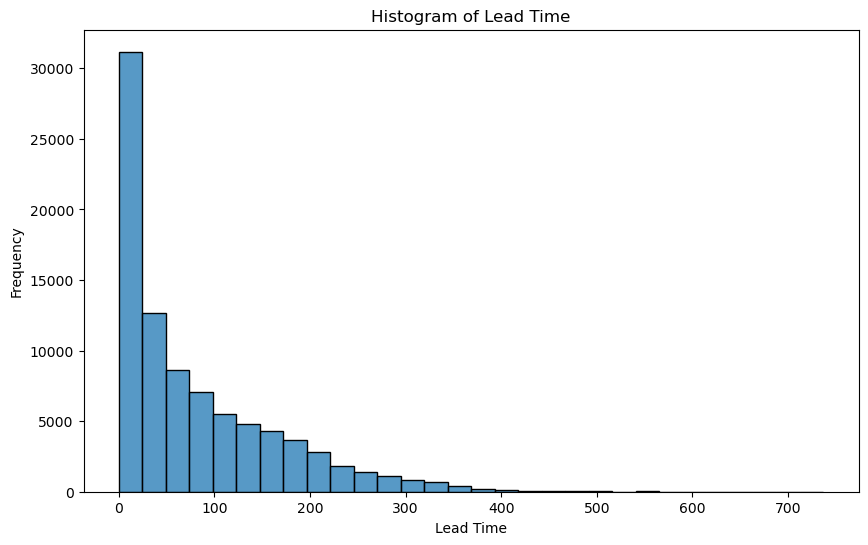

In [26]:
# Histogram of lead_time
plt.figure(figsize=(10, 6))
sns.histplot(data_clean['lead_time'], bins=30)
plt.title('Histogram of Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.show()

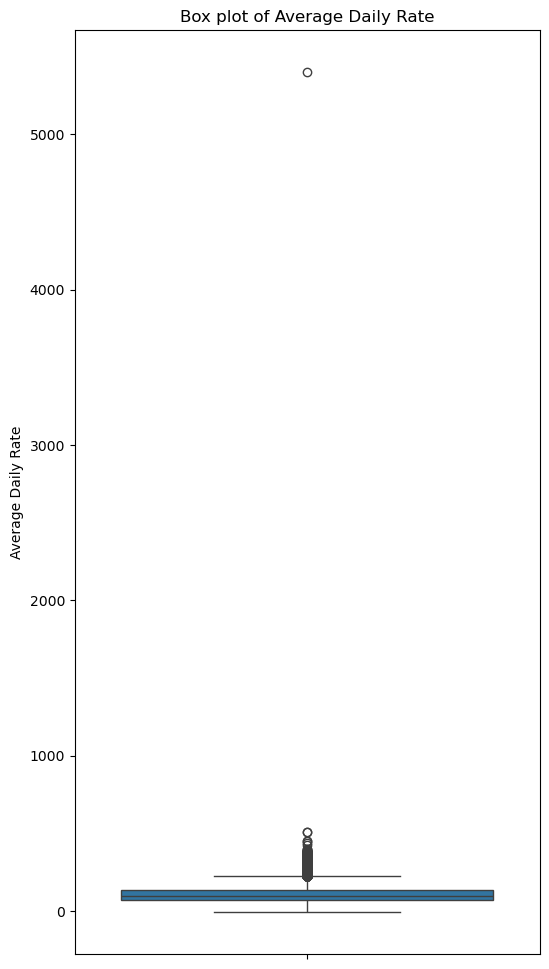

In [27]:
# Box plot of Average Daily Rate
plt.figure(figsize=(6, 12))
sns.boxplot(y=data_clean['adr'])
plt.title('Box plot of Average Daily Rate')
plt.ylabel('Average Daily Rate')
plt.show()

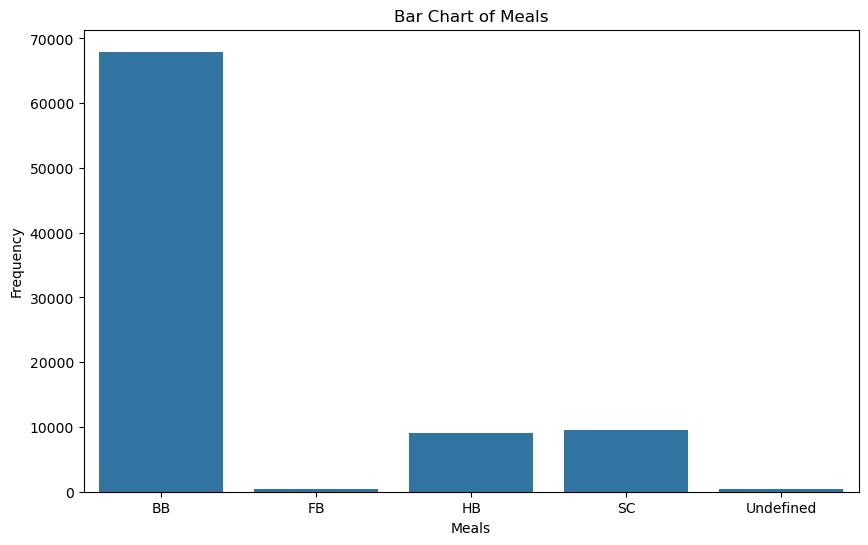

In [28]:
# Bar plot for meal
plt.figure(figsize=(10, 6))
sns.countplot(x=data_clean['meal'])
plt.title('Bar Chart of Meals')
plt.xlabel('Meals')
plt.ylabel('Frequency')
plt.show()

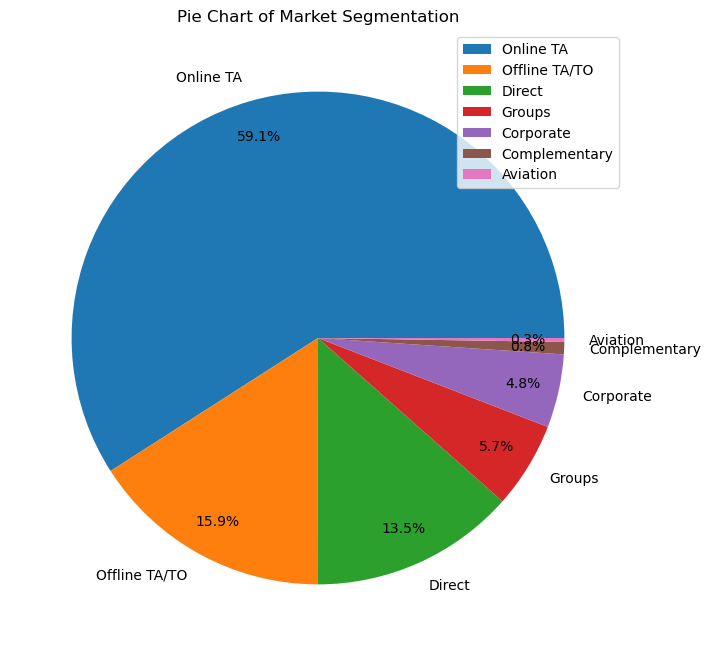

In [29]:
# Pie chart for market segment
plt.figure(figsize=(8, 8))
segments = list(data_clean['market_segment'].value_counts())
plt.pie(segments, 
        labels=data_clean['market_segment'].value_counts().index,
        autopct='%.1f%%', 
        pctdistance=0.85,  # Adjust percentage label distance
       )
plt.title('Pie Chart of Market Segmentation')
plt.legend()
plt.show()

In [30]:
data_clean['market_segment'].value_counts()

market_segment
Online TA        51613
Offline TA/TO    13882
Direct           11797
Groups            4943
Corporate         4206
Complementary      702
Aviation           227
Name: count, dtype: int64

#### It will be better if we use a bar chart

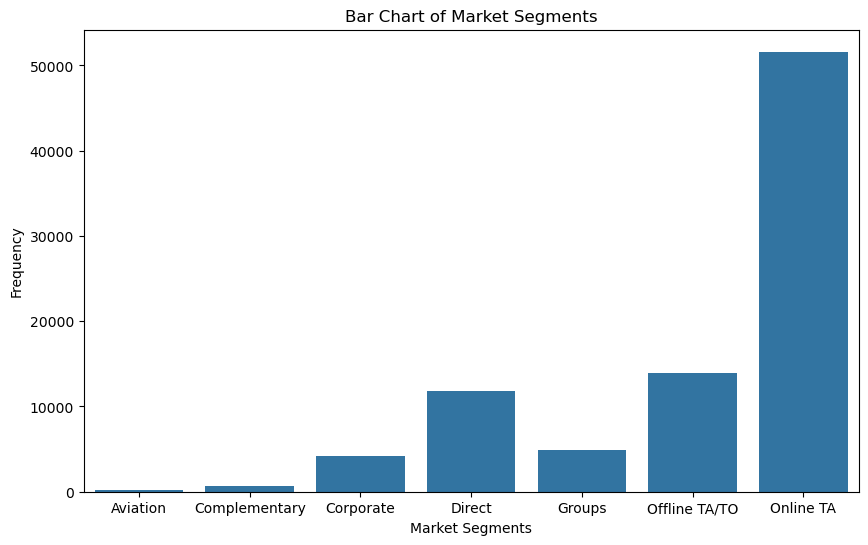

In [31]:
# Bar plot for Market Segments
plt.figure(figsize=(10, 6))
sns.countplot(x=data_clean['market_segment'])
plt.title('Bar Chart of Market Segments')
plt.xlabel('Market Segments')
plt.ylabel('Frequency')
plt.show()

#### Let's find out the relationship between Average Daily Rate and Booking Changes 

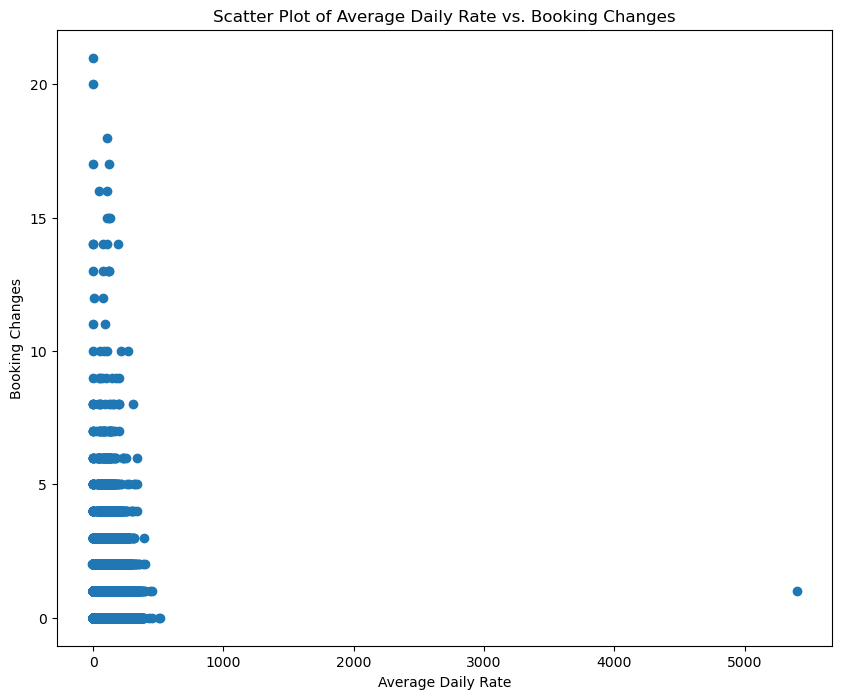

In [32]:
# Scatter plot of: Average Daily Rate vs. Booking Changes (not related)
plt.figure(figsize=(10, 8))
plt.scatter(x=data_clean['adr'], y=data_clean['booking_changes'])
plt.title('Scatter Plot of Average Daily Rate vs. Booking Changes')
plt.xlabel('Average Daily Rate')
plt.ylabel('Booking Changes')
plt.show()

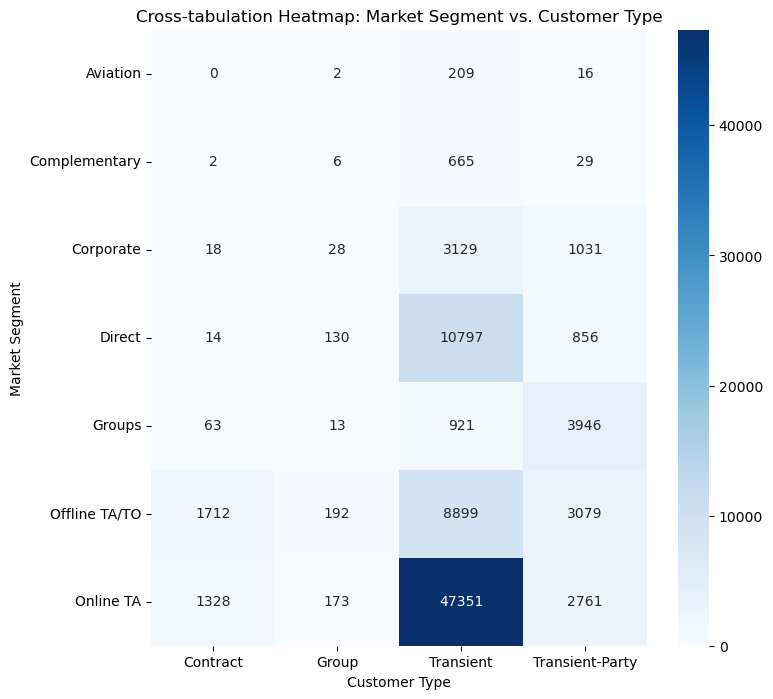

In [189]:
# Cross Tabulation Heatmap Visualization of market segment and customer type
cross_tab = pd.crosstab(data_clean['market_segment'], data_clean['customer_type'])
plt.figure(figsize=(8, 8))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Cross-tabulation Heatmap: Market Segment vs. Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Market Segment')
plt.show()

In [34]:
# Create a trend graph here (involving date)

### Correlation Analysis

In [35]:
correlation = data_clean.corr(method='pearson', numeric_only=True)
correlation

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
lead_time,1.000000,0.101215,0.009890,0.234904,0.309983,0.140401,0.028560,-0.003645,0.005347,-0.078961,0.076908,0.132924,0.023337,-0.086634,0.034133
arrival_date_week_number,0.101215,1.000000,0.093569,0.026773,0.027692,0.024150,0.013391,0.014249,0.007188,-0.020838,0.011872,0.014240,0.098055,0.008888,0.046460
arrival_date_day_of_month,0.009890,0.093569,1.000000,-0.017907,-0.028359,-0.001108,0.015812,-0.000393,-0.008540,0.000153,0.006291,0.006794,0.022412,0.009199,-0.001639
stays_in_weekend_nights,0.234904,0.026773,-0.017907,1.000000,0.555470,0.088190,0.028560,0.013667,-0.020641,-0.056663,0.050301,-0.031846,0.038879,-0.042936,0.032493
stays_in_week_nights,0.309983,0.027692,-0.028359,0.555470,1.000000,0.095470,0.030476,0.016008,-0.018789,-0.058520,0.085023,0.001751,0.053187,-0.044317,0.037855
adults,0.140401,0.024150,-0.001108,0.088190,0.095470,1.000000,0.023664,0.016629,-0.042116,-0.120948,-0.048108,-0.015530,0.248923,0.007754,0.112639
children,0.028560,0.013391,0.015812,0.028560,0.030476,0.023664,1.000000,0.017420,-0.019212,-0.029429,0.031280,-0.020382,0.326304,0.036248,0.044611
babies,-0.003645,0.014249,-0.000393,0.013667,0.016008,0.016629,0.017420,1.000000,-0.005397,-0.009196,0.081032,-0.006825,0.023440,0.030882,0.094831
previous_cancellations,0.005347,0.007188,-0.008540,-0.020641,-0.018789,-0.042116,-0.019212,-0.005397,1.000000,0.392063,-0.010274,0.003612,-0.050297,-0.003403,0.001870
previous_bookings_not_canceled,-0.078961,-0.020838,0.000153,-0.056663,-0.058520,-0.120948,-0.029429,-0.009196,0.392063,1.000000,0.005414,-0.006299,-0.085768,0.040870,0.027114


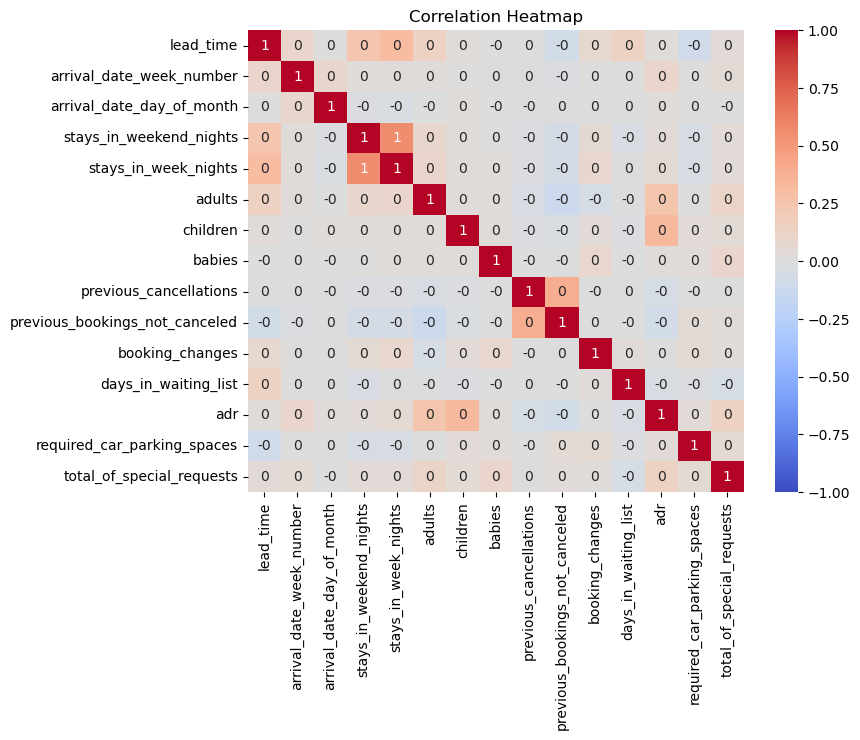

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.0f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

### Categorical Data Analysis

In [37]:
data_clean.describe(include='category')

,hotel,is_canceled,arrival_date_year,arrival_date_month,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,agent,company,customer_type,reservation_status
count,87370,87370,87370,87370,87370,87370,87370,87370,87370,87370,87370,87370,87370.0,87370.0,87370,87370
unique,2,2,3,12,5,177,7,5,2,10,12,3,334.0,353.0,4,3
top,City Hotel,0,2016,August,BB,PRT,Online TA,TA/TO,0,A,A,No Deposit,9.0,0.0,Transient,Check-Out
freq,53428,63348,42384,11251,67956,27880,51613,69133,83955,56536,46306,86225,28758.0,82115.0,71971,63348


In [38]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [53]:
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder()

In [52]:
data_clean['hotel'].value_counts()

hotel
City Hotel      53428
Resort Hotel    33942
Name: count, dtype: int64

#### There are two types of hotel. So, we can encode them as: City Hotel = 0 and Resort Hotel = 1

In [105]:
hotel_enc = one_hot_encoder.fit_transform(data_clean[['hotel']]).toarray()
enc_df = pd.DataFrame(hotel_enc, columns=one_hot_encoder.get_feature_names_out(['hotel']))

# Concatenate the encoded dataset with the origin one
joined_df = pd.concat([enc_df, data_clean.reset_index(drop=True)], axis=1)

In [106]:
# Drop the hotel column from the dataset
joined_df = joined_df.drop('hotel', axis=1)

In [107]:
joined_df

,hotel_City Hotel,hotel_Resort Hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0.0,1.0,0,342,2015,July,27,1,0,0,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-01-07
1,0.0,1.0,0,737,2015,July,27,1,0,0,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-01-07
2,0.0,1.0,0,7,2015,July,27,1,0,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-02-07
3,0.0,1.0,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-02-07
4,0.0,1.0,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-03-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87365,1.0,0.0,0,23,2017,August,35,30,2,5,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-06-09
87366,1.0,0.0,0,102,2017,August,35,31,2,5,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-07-09
87367,1.0,0.0,0,34,2017,August,35,31,2,5,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-07-09
87368,1.0,0.0,0,109,2017,August,35,31,2,5,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-07-09


#### Columns to encode using LabelEncoder:

- meal (BB = 0, FB = 1, HB = 2, SC = 3, Undefined = 4)
- country -> **NOTE**: Don't Encode
- market_segment (Aviation = 0, Complementary = 1, Corporate = 2, Direct = 3, Groups = 4, Offline TA/TO = 5, Online TA = 6)
- distribution_channel (Corporate = 0, Direct = 1, GDS = 2, TA/TO = 3, Undefined = 4)
- reserved_room_type (A = 0, B = 1, C = 2, D = 3, E = 4, F = 5, G = 6, H = 7, L = 8, P = 9) -> **NOTE**: Don't Encode
- assigned_room_type (A = 0, B = 1, C = 2, D = 3, E = 4, F = 5, G = 6, H = 7, I = 8, K = 9, L = 10, P = 11) -> **NOTE**: Don't Encode
- deposit_type (No Deposit = 0, Non Refund = 1, Refundable = 2)
- customer_type (Contract = 0, Group = 1, Transient = 2, Transient-Party = 3)
- reservation_status (Canceled = 0, Check-Out = 1, No-Show = 2)

In [136]:
# These are the columns that are to be encoded
cols_to_encode = ['meal', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type', 'reservation_status']

for col in cols_to_encode:
    joined_df[col] = label_encoder.fit_transform(joined_df[col])    

In [191]:
# Verify whether the columns are encoded properly or not!
joined_df[cols_to_encode].head()

,meal,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
0,0,3,1,0,2,1
1,0,3,1,0,2,1
2,0,3,1,0,2,1
3,0,2,0,0,2,1
4,0,6,3,0,2,1


#### Analyzing Categorical Columns

In [145]:
categorical_cols = data_clean.describe(include='category').columns

In [147]:
# Summary Statistics of Categorical columns
data_clean.describe(include='category')

,hotel,is_canceled,arrival_date_year,arrival_date_month,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,agent,company,customer_type,reservation_status
count,87370,87370,87370,87370,87370,87370,87370,87370,87370,87370,87370,87370,87370.0,87370.0,87370,87370
unique,2,2,3,12,5,177,7,5,2,10,12,3,334.0,353.0,4,3
top,City Hotel,0,2016,August,BB,PRT,Online TA,TA/TO,0,A,A,No Deposit,9.0,0.0,Transient,Check-Out
freq,53428,63348,42384,11251,67956,27880,51613,69133,83955,56536,46306,86225,28758.0,82115.0,71971,63348


In [152]:
for col in categorical_cols:
    print(f'Frequency of items in {col.title()}:')
    print(data_clean[col].value_counts())
    print()

Frequency of items in Hotel:
hotel
City Hotel      53428
Resort Hotel    33942
Name: count, dtype: int64

Frequency of items in Is_Canceled:
is_canceled
0    63348
1    24022
Name: count, dtype: int64

Frequency of items in Arrival_Date_Year:
arrival_date_year
2016    42384
2017    31685
2015    13301
Name: count, dtype: int64

Frequency of items in Arrival_Date_Month:
arrival_date_month
August       11251
July         10051
May           8355
April         7905
June          7765
March         7510
October       6936
September     6690
February      6092
December      5129
November      4995
January       4691
Name: count, dtype: int64

Frequency of items in Meal:
meal
BB           67956
SC            9481
HB            9083
Undefined      490
FB             360
Name: count, dtype: int64

Frequency of items in Country:
country
PRT    27880
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
MDG        1
LCA        1
KIR        1
PYF        1
KHM        1
Name: count, Leng

In [160]:
# Remove some columsn from the categorical columns
cols_to_remove = ['country', 'agent', 'company']
categorical_cols = categorical_cols.difference(cols_to_remove)

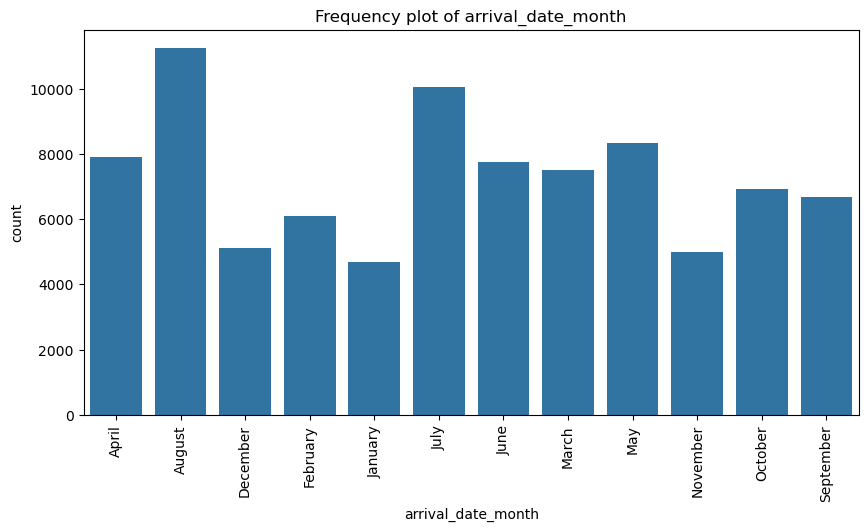

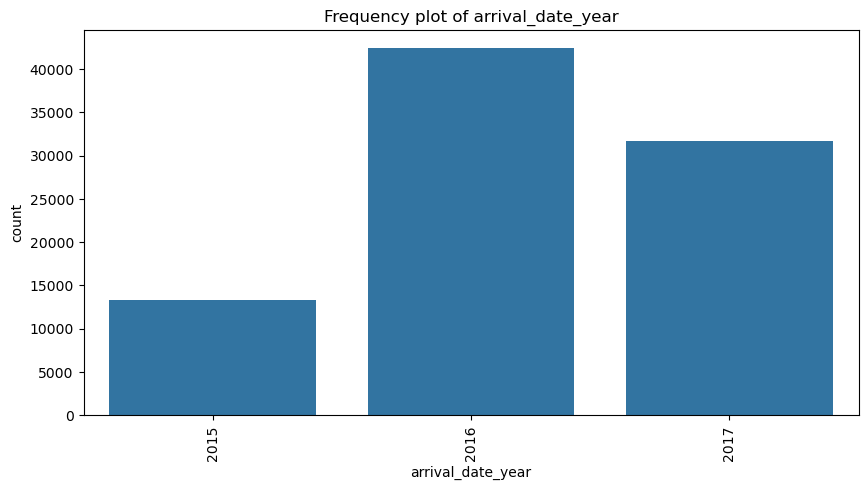

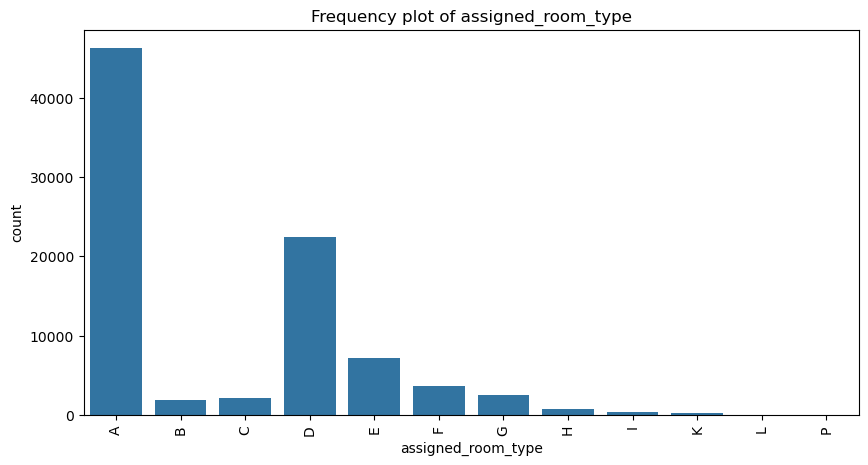

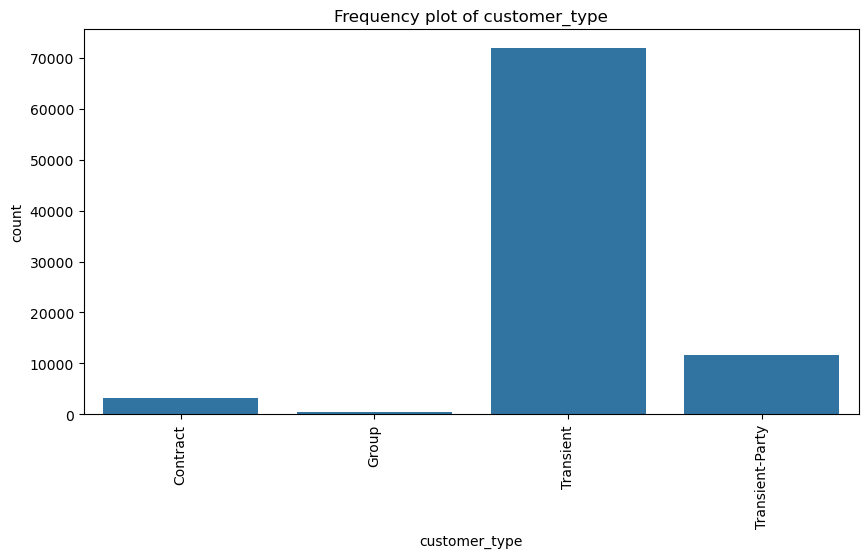

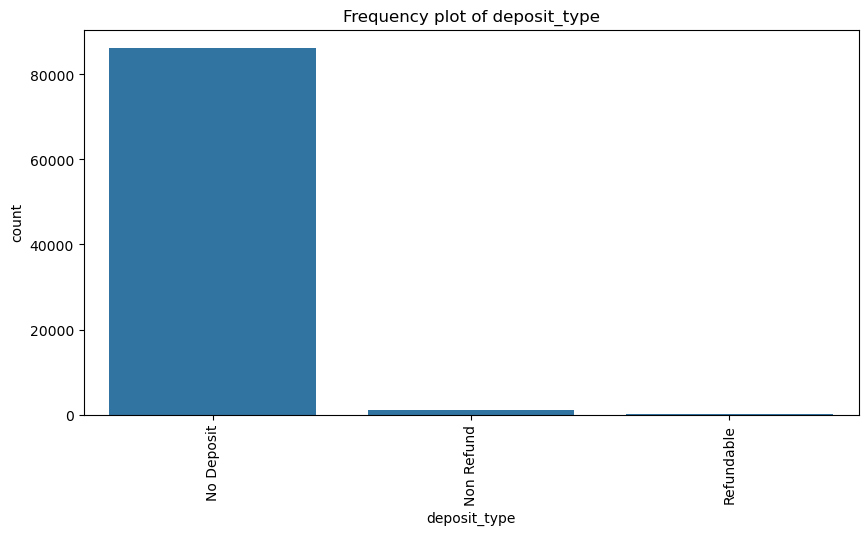

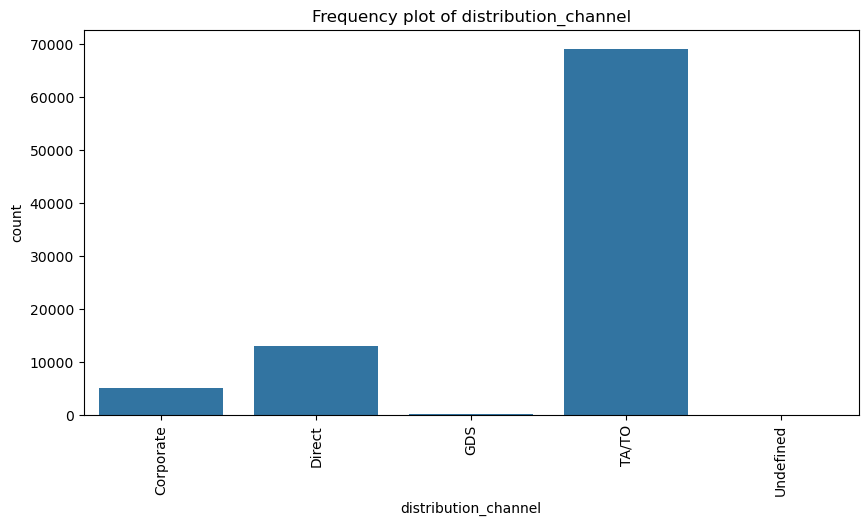

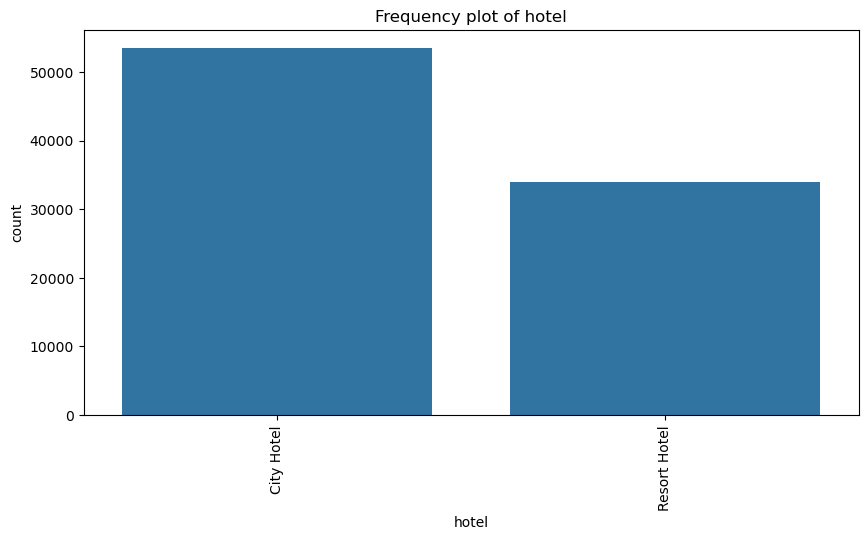

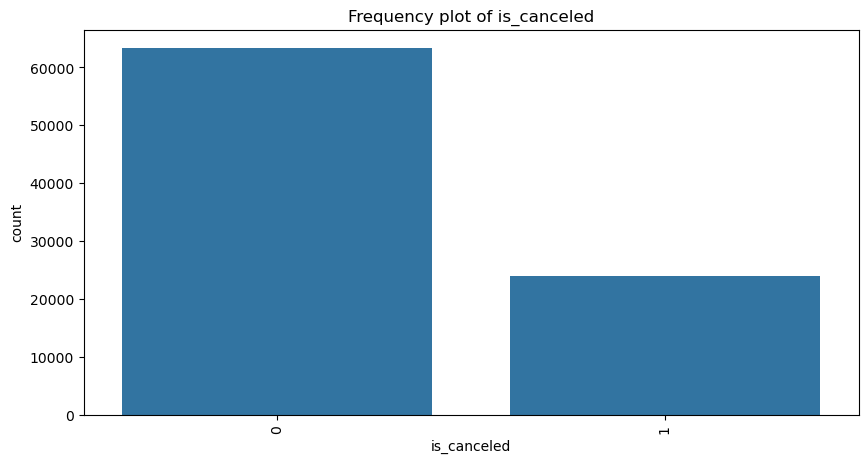

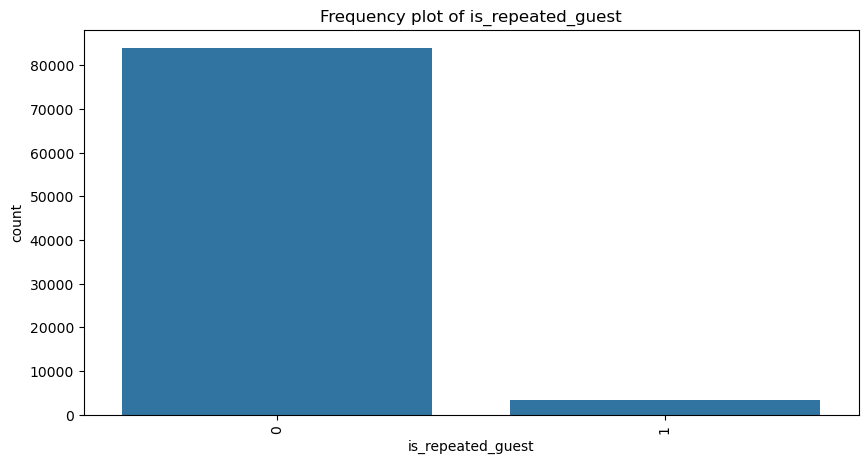

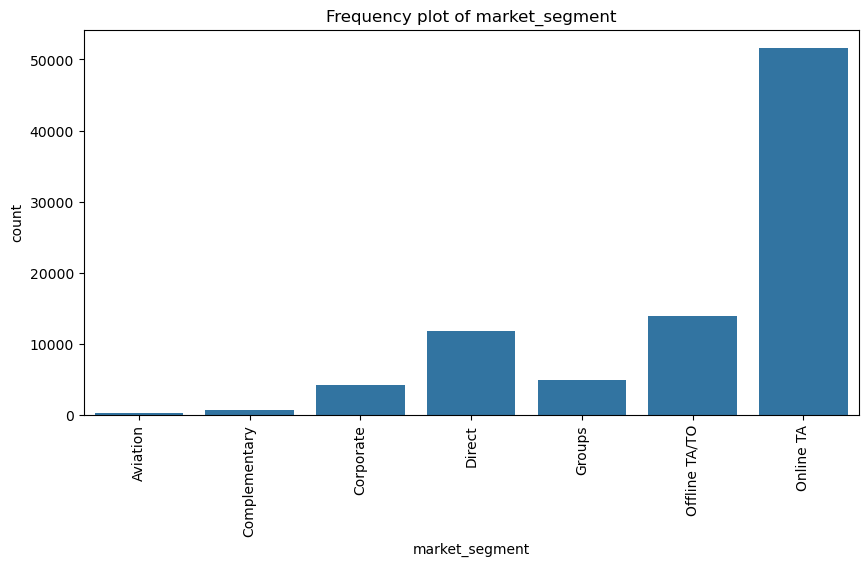

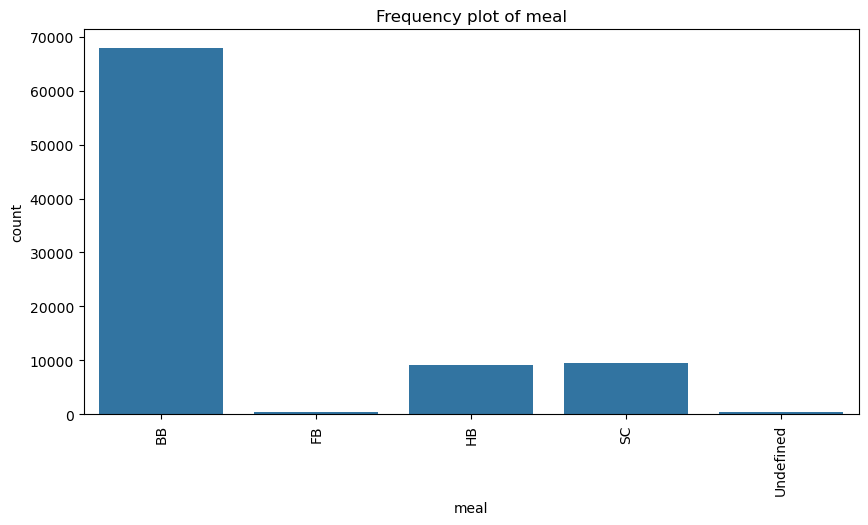

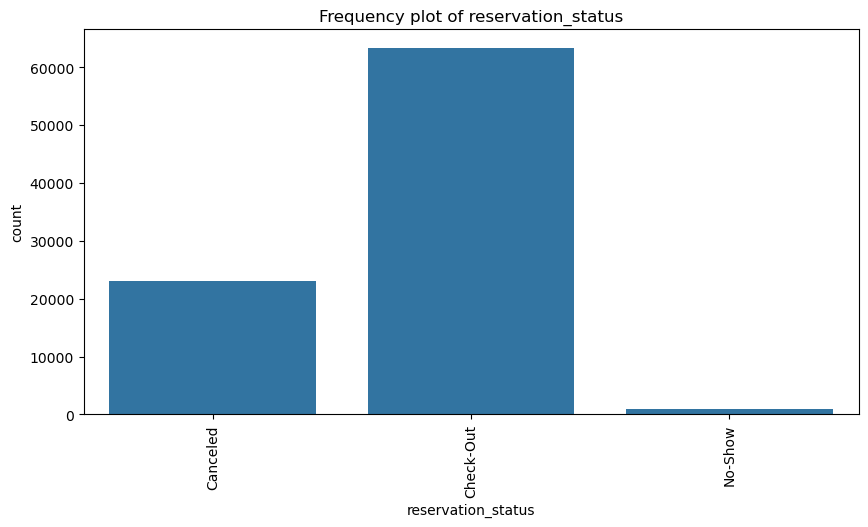

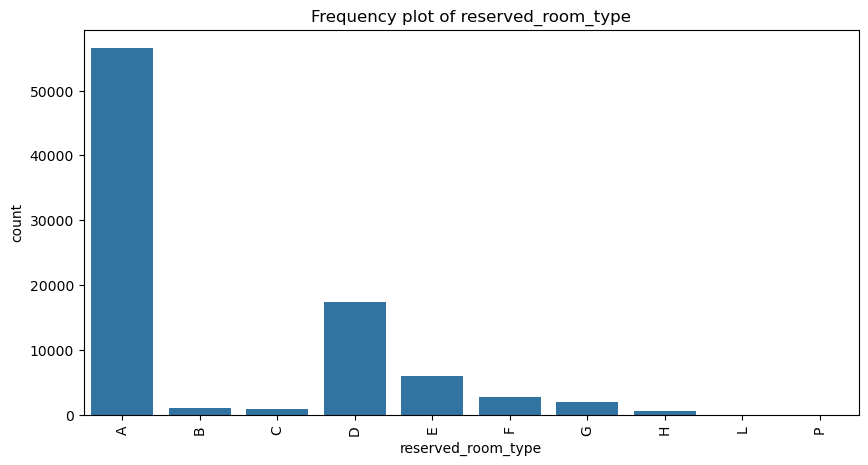

In [162]:
# Bar plots for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data_clean, x=col)
    plt.title(f'Frequency plot of {col}')
    plt.xticks(rotation=90)
    plt.show()

In [163]:
# Contingency table between hotel and market_segment
contingency_table = pd.crosstab(data_clean['hotel'], data_clean['market_segment'])
contingency_table

market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA
hotel,,,,,,,
City Hotel,227,513,2227,5558,2638,7272,34993
Resort Hotel,0,189,1979,6239,2305,6610,16620


In [166]:
from statsmodels.graphics.mosaicplot import mosaic

<Figure size 1200x1200 with 0 Axes>

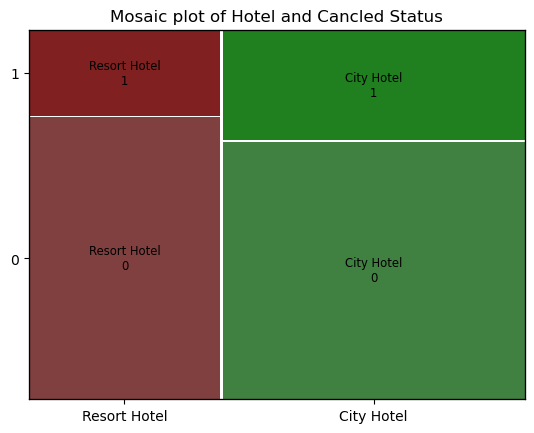

In [229]:
# Create the mosiac plot
plt.figure(figsize=(12, 12))
mosaic(data_clean, ['hotel', 'is_canceled'])
plt.title('Mosaic plot of Hotel and Cancled Status')
plt.show()

### Time Series Analysis

In [193]:
# Copy the dataset in a new variable
new_df = data_clean.copy()

In [206]:
# Combine the separate arrival year, month, and day as arrival date
new_df['arrival_date'] = pd.to_datetime(new_df['arrival_date_year'].astype(str) + '-' + new_df['arrival_date_month'].astype(str) + '-' + new_df['arrival_date_day_of_month'].astype(str), errors='raise')
new_df['arrival_date'] = pd.to_datetime(new_df['arrival_date'])

In [200]:
new_df[['arrival_date', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].head()

,arrival_date,arrival_date_year,arrival_date_month,arrival_date_day_of_month
0,2015-07-01,2015,July,1
1,2015-07-01,2015,July,1
2,2015-07-01,2015,July,1
3,2015-07-01,2015,July,1
4,2015-07-01,2015,July,1


In [240]:
# Group by year and month to see the number of bookings
monthly_bookings = new_df.groupby(new_df['arrival_date'].dt.to_period('M')).size()

# Convert movie bookings to a dataframe
monthly_bookings = monthly_bookings.to_frame(name='bookings').reset_index()

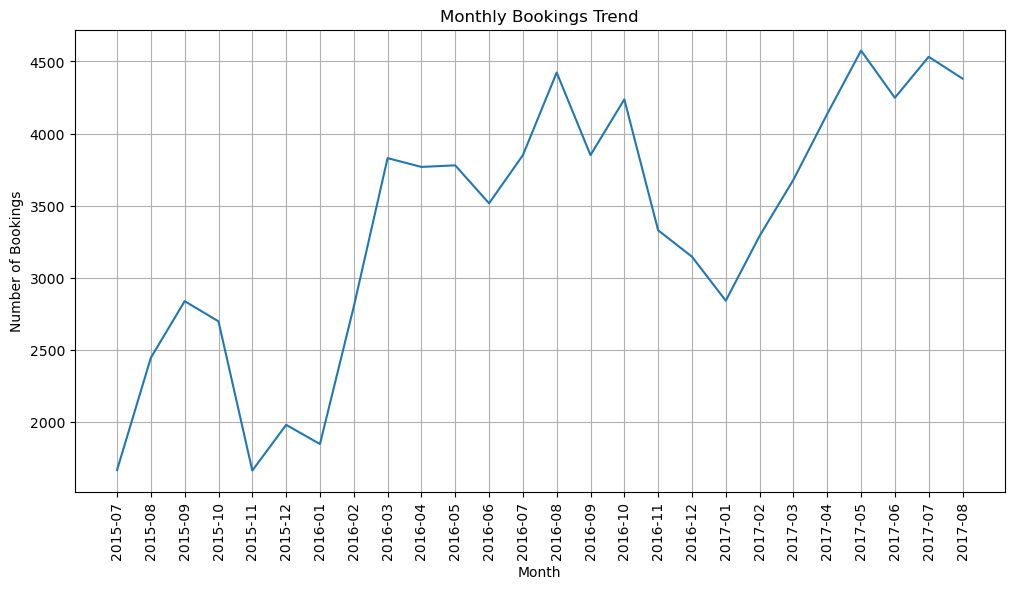

In [245]:
# Plot the monthly bookings
plt.figure(figsize=(12, 6))
plt.plot(monthly_bookings['arrival_date'].astype(str), monthly_bookings['bookings'])
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.title('Monthly Bookings Trend')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()